In [35]:
import sys
sys.path.append('/home/levicivita/Downloads/GaPP/gapp/covfunctions/')
sys.path.append('/home/levicivita/Downloads/GaPP/gapp/')
import cov
import covfunctions
import gp
import dgp

import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate as interpolate
%matplotlib inline

In [86]:
x = np.array([1,2,4,6,7,8,10,12,15,17,19,20,22,23,24,28])
noise = np.random.normal(0,0.15,len(x))
y = np.sin(x/(np.pi)) + noise
err = (1/noise/20)**2 + 0.3
print(err)

[   1.26369929    1.47606092  120.92793872    0.47364668    0.30774969
    0.40808573    0.44505083    0.94342231    0.39094668    0.4103418
    0.43278833    0.58998699    0.38610508    0.95194256    2.61316763
    0.37775238]


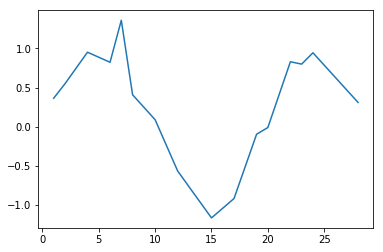

In [87]:
plt.plot(x,y)
plt.show()

In [88]:
spl = interpolate.splrep(x,y)
g=dgp.DGaussianProcess(x, y, err, cXstar=(x.min(), x.max(), 100))

In [89]:
initheta = [500,20]
rec, theta=g.gp(theta=initheta) 

/home/levicivita/Downloads/GaPP/gapp/gp.py:497: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if (self.alpha == None):
/home/levicivita/Downloads/GaPP/gapp/gp.py:514: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if (self.alpha == None):



Optimized hyperparameters:
theta = [ 0.76712126  3.85818728]


/home/levicivita/Downloads/GaPP/gapp/gp.py:568: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if (self.alpha == None):


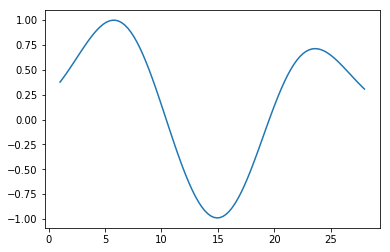

In [90]:
xnew = rec[:,0]
ynew = rec[:,1]
errnew = rec[:,2]
plt.plot(xnew, ynew)